<a href="https://colab.research.google.com/github/Saurav-Raghaw/Optimization/blob/main/Experiment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Comparison Between Our NOVEL PID and Classical PID

In [6]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import numpy as np

from decimal import Decimal, localcontext

In [7]:
def func(x1, x2):
  return 0.1*x1**2 + 2*x2**2

In [8]:
def grad_func_x1(x1):
  return 0.2*x1

In [9]:
def grad_func_x2(x2):
  return 4*x2

#PID

In [10]:
def PID_Otimizer(lr=0.05, Kd=0.9):
  x1, x2 = -10, -10 #parameters
  gamma = 0.9	

  log = [] # lists to store learning process

  x1_prev,x2_prev = x1, x2
  grad_x1, grad_x2 = 0,0
  mt_x1, dt_x1, mt_x2, dt_x2 = 0,0,0,0

  prev_grad_x1, prev_grad_x2 = 0,0
  prev_mt_x1, prev_mt_x2, prev_dt_x1, prev_dt_x2 =0,0,0,0

  t=0

  while(1):
    t=t+1

    grad_x1 = grad_func_x1(x1)
    grad_x2 = grad_func_x2(x2)

    mt_x1 = gamma*prev_mt_x1 + lr*grad_x1
    dt_x1 = gamma*prev_dt_x1 + (1-gamma)*(grad_x1 - prev_grad_x1)

    prev_mt_x1 = mt_x1
    prev_dt_x1 = dt_x1
    prev_grad_x1 = grad_x1

    mt_x2 = gamma*prev_mt_x2 + lr*grad_x2
    dt_x2 = gamma*prev_dt_x2 + (1-gamma)*(grad_x2 - prev_grad_x2)

    prev_mt_x2 = mt_x2
    prev_dt_x2 = dt_x2
    prev_grad_x2 = grad_x2

    log.append((x1,x2))

    x1_prev = x1
    x2_prev = x2

    x1 = x1 - mt_x1 - Kd*dt_x1
    x2 = x2 - mt_x2 - Kd*dt_x2

    if(x1_prev == x1 and x2_prev == x2):
      break

  return x1, x2, log

In [11]:
x1, x2, log1 = PID_Otimizer(lr=0.01, Kd=4) 
x1, x2, log2 = PID_Otimizer(lr=0.01, Kd=3)
x1, x2, log3 = PID_Otimizer(lr=0.01, Kd=2)
x1, x2, log4 = PID_Otimizer(lr=0.01, Kd=1)
x1, x2, log5 = PID_Otimizer(lr=0.01, Kd=0.9)
x1, x2, log6 = PID_Otimizer(lr=0.01, Kd=0.8)
x1, x2, log7 = PID_Otimizer(lr=0.01, Kd=0.75)

#NOVEL PID:
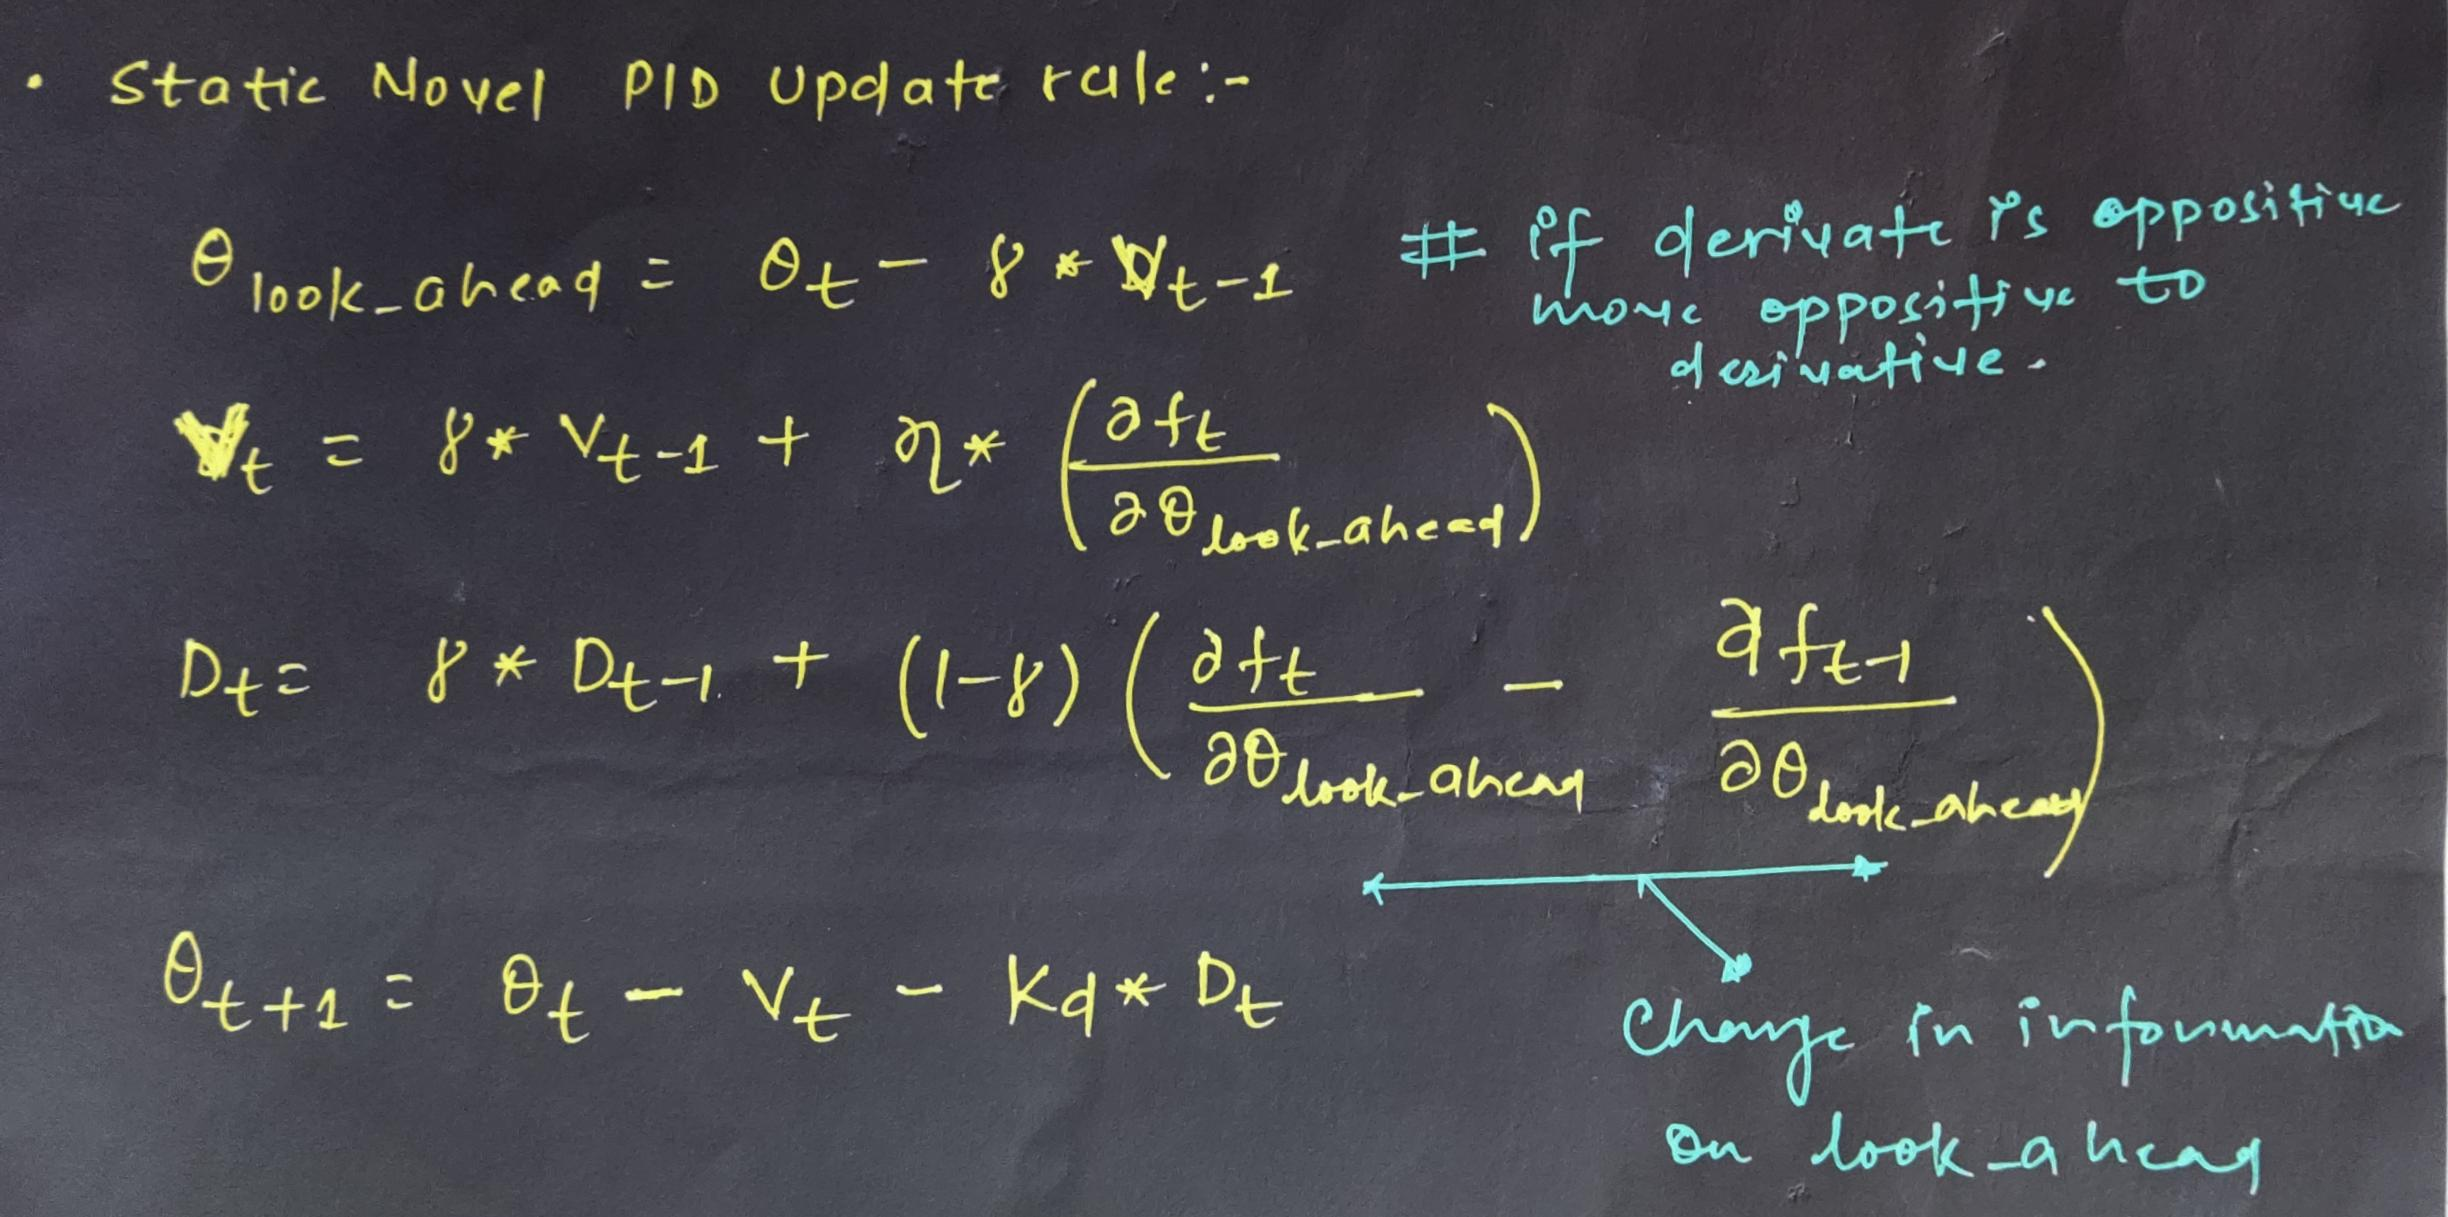

In [12]:
def Adaptive_PID_Nes(lr=0.05, Kd=0.9):
  x1, x2 = -10, -10 # parameters
  log = []  #list to store the value of x1 and x2 i.e learning 

  gamma =0.9 # momentum parameter
  eps = 1e-8

  prev_x1, prev_x2 = x1, x2
  grad_x1, grad_x2 = 0,0
  vt_x1, dt_x1, vt_x2, dt_x2 = 0,0,0,0

  prev_grad_x1, prev_grad_x2 = 0,0
  prev_vt_x1, prev_vt_x2, prev_dt_x1, prev_dt_x2 =0,0,0,0

  x1_look_ahead, x2_look_ahead = 0,0

  t = 0

  while(1):
    t+=1

    x1_look_ahead = x1 - gamma*prev_vt_x1
    x2_look_ahead = x2 - gamma*prev_vt_x2

    grad_x1 = grad_func_x1(x1_look_ahead)
    grad_x2 = grad_func_x2(x2_look_ahead)

    vt_x1 = gamma*prev_vt_x1 + (lr*grad_x1)
    vt_x2 = gamma*prev_vt_x2 + (lr*grad_x2)

    dt_x1 = gamma*prev_dt_x1 + (1-gamma)*(grad_x1 - prev_grad_x1)
    dt_x2 = gamma*prev_dt_x2 + (1-gamma)*(grad_x2 - prev_grad_x2)

    prev_grad_x1 = grad_x1
    prev_grad_x2 = grad_x2

    prev_vt_x1 = vt_x1
    prev_vt_x2 = vt_x2

    prev_dt_x1 = dt_x1
    prev_dt_x2 = dt_x2

    prev_x1 = x1
    prev_x2 = x2

    log.append((x1, x2))

    x1 = x1 - vt_x1 - Kd*dt_x1
    x2 = x2 - vt_x2 - Kd*dt_x2

    if(x1 == prev_x1 and x2 == prev_x2):
      break

  return x1, x2, log

In [13]:
x1, x2, log_1 = Adaptive_PID_Nes(lr=0.01, Kd=4) #Kd = 4
x1, x2, log_2 = Adaptive_PID_Nes(lr=0.01, Kd=3) #Kd = 3
x1, x2, log_3 = Adaptive_PID_Nes(lr=0.01, Kd=2) #Kd = 2
x1, x2, log_4 = Adaptive_PID_Nes(lr=0.01, Kd=1) #Kd = 1
x1, x2, log_5 = Adaptive_PID_Nes(lr=0.01, Kd=0.9) #Kd = 0.9
x1, x2, log_6 = Adaptive_PID_Nes(lr=0.01, Kd=0.8) #Kd = 0.8
x1, x2, log_7 = Adaptive_PID_Nes(lr=0.01, Kd=0.75) #Kd = 0.75    

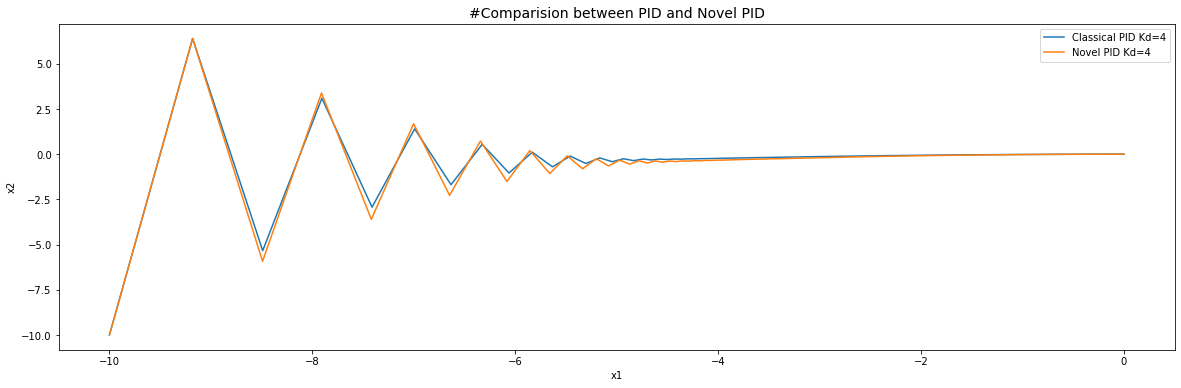

CPU times: user 382 ms, sys: 22 ms, total: 404 ms
Wall time: 405 ms


In [14]:
%%time
x_val = [l[0] for l in log1]
y_val = [l[1] for l in log1]

x_val_1 = [l[0] for l in log_1]
y_val_1 = [l[1] for l in log_1]

plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227

plt.title('#Comparision between PID and Novel PID', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val,y_val, label='Classical PID Kd=4')
plt.plot(x_val_1,y_val_1, label='Novel PID Kd=4')

plt.legend()

plt.show()

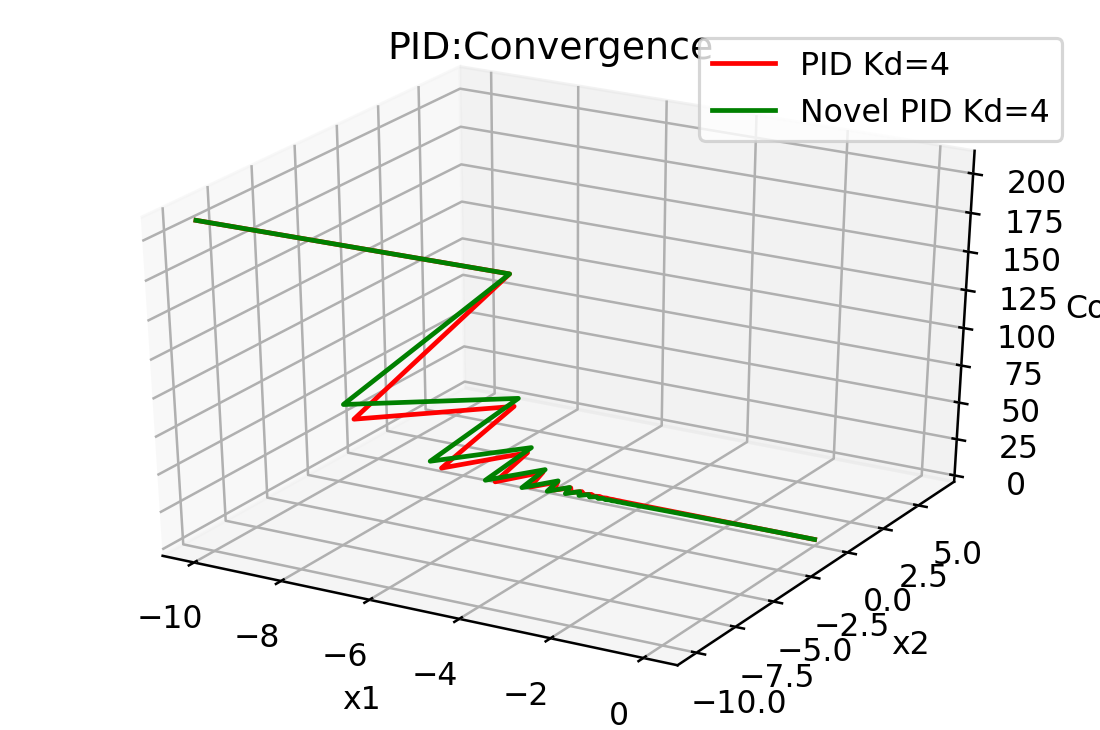

CPU times: user 689 ms, sys: 391 ms, total: 1.08 s
Wall time: 662 ms


In [15]:
%%time
x_val_1 = [l[0] for l in log_1]
y_val_1 = [l[1] for l in log_1]
costs_1 = np.array([func(x_val_1, y_val_1) for x_val_1, y_val_1 in zip(x_val_1, y_val_1)])

x_val = [l[0] for l in log1]
y_val = [l[1] for l in log1]

costs = np.array([func(x_val, y_val) for x_val, y_val in zip(x_val, y_val)])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.plot_trisurf(x_val, y_val, costs, linewidth=0.1, antialiased=True,cmap='viridis', edgecolor='none')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Cost')

ax.set_title('PID:Convergence')
ax.plot(x_val, y_val,costs, color='red', label='PID Kd=4')
ax.plot(x_val_1, y_val_1,costs_1, color='green', label = 'Novel PID Kd=4')

plt.legend()
plt.show()


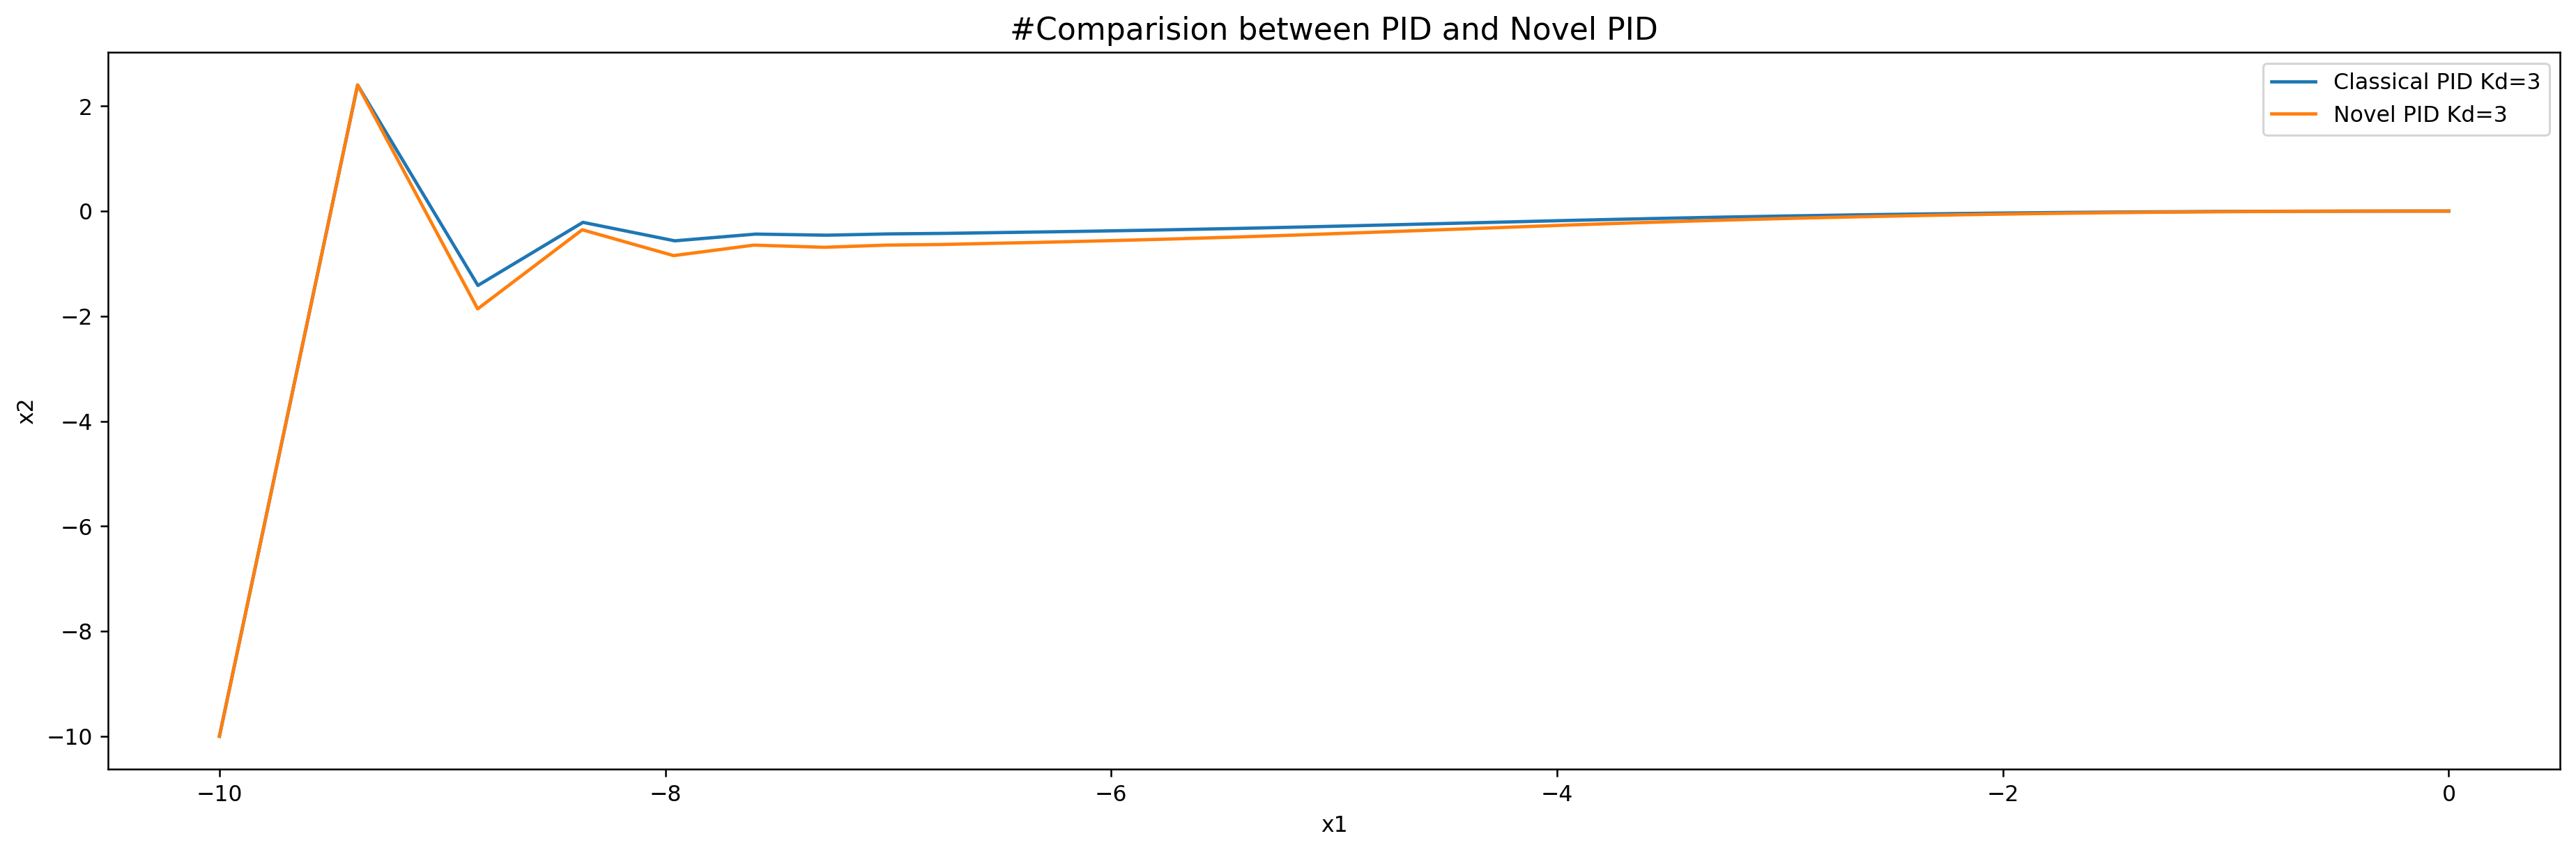

CPU times: user 875 ms, sys: 23 ms, total: 898 ms
Wall time: 914 ms


In [16]:
%%time
x_val = [l[0] for l in log2]
y_val = [l[1] for l in log2]

x_val_2 = [l[0] for l in log_2]
y_val_2 = [l[1] for l in log_2]

plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227

plt.title('#Comparision between PID and Novel PID', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val,y_val, label='Classical PID Kd=3')
plt.plot(x_val_2,y_val_2, label='Novel PID Kd=3')

plt.legend()

plt.show()

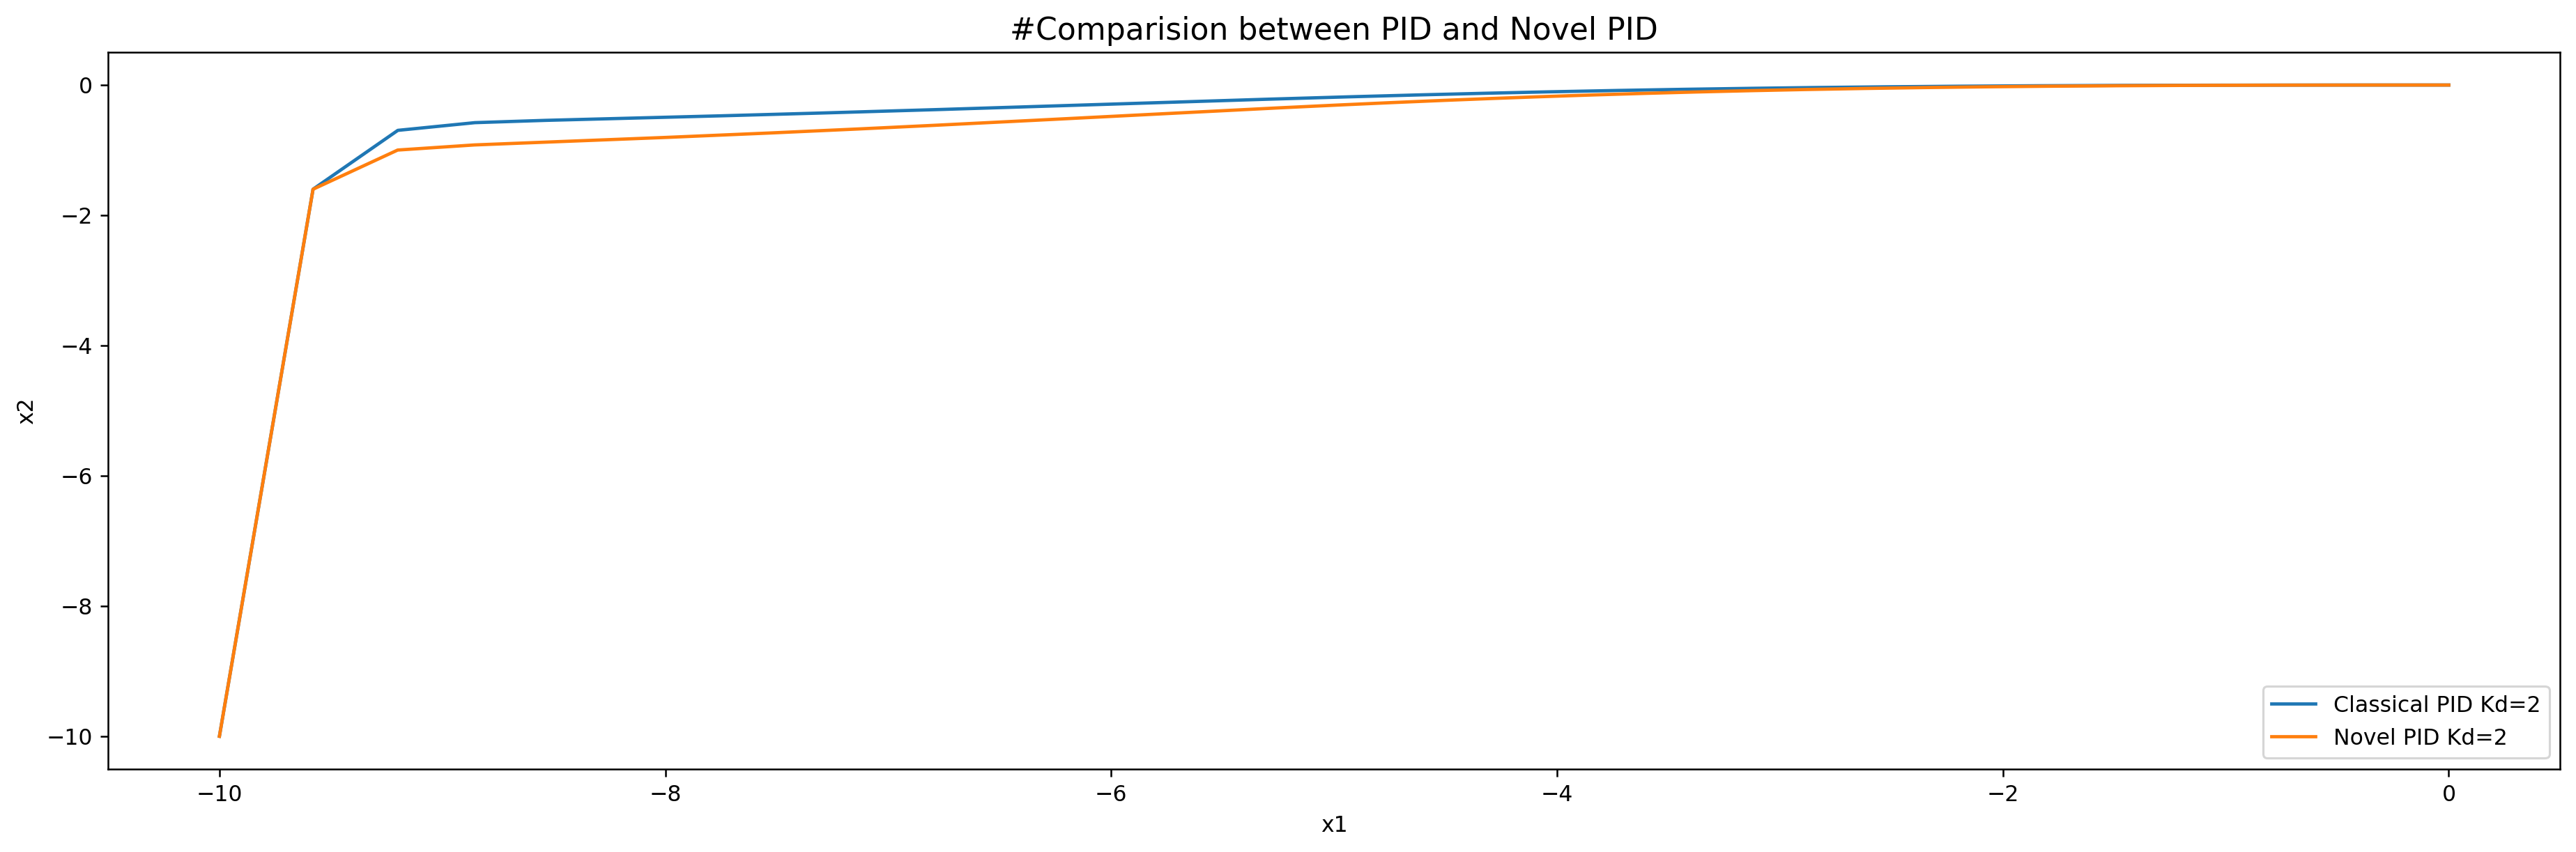

CPU times: user 931 ms, sys: 18.6 ms, total: 949 ms
Wall time: 950 ms


In [17]:
%%time
x_val = [l[0] for l in log3]
y_val = [l[1] for l in log3]

x_val_3 = [l[0] for l in log_3]
y_val_3 = [l[1] for l in log_3]

plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227

plt.title('#Comparision between PID and Novel PID', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val,y_val, label='Classical PID Kd=2')
plt.plot(x_val_3,y_val_3, label='Novel PID Kd=2')

plt.legend()

plt.show()

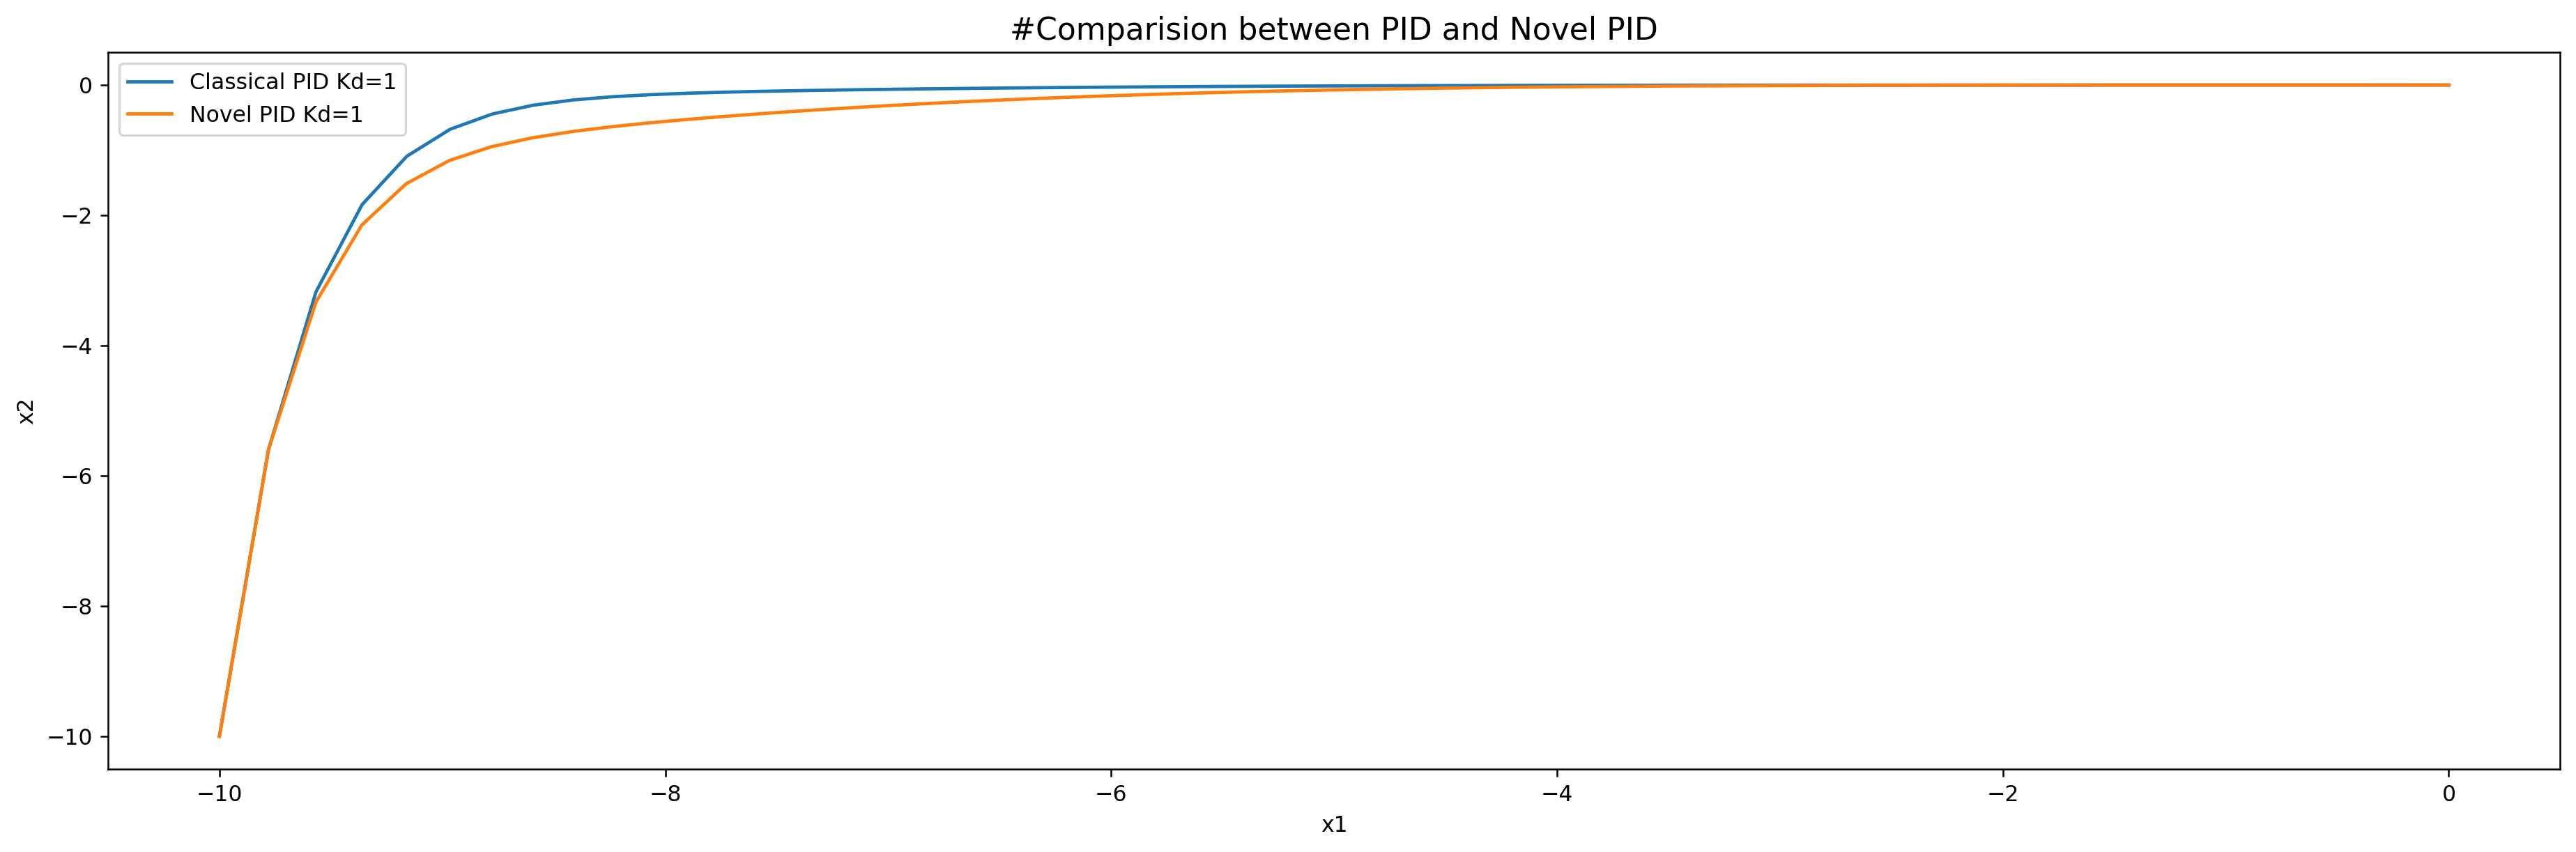

CPU times: user 880 ms, sys: 19.7 ms, total: 899 ms
Wall time: 904 ms


In [18]:
%%time
x_val = [l[0] for l in log4]
y_val = [l[1] for l in log4]

x_val_4 = [l[0] for l in log_4]
y_val_4 = [l[1] for l in log_4]

plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227

plt.title('#Comparision between PID and Novel PID', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val,y_val, label='Classical PID Kd=1')
plt.plot(x_val_4,y_val_4, label='Novel PID Kd=1')

plt.legend()

plt.show()

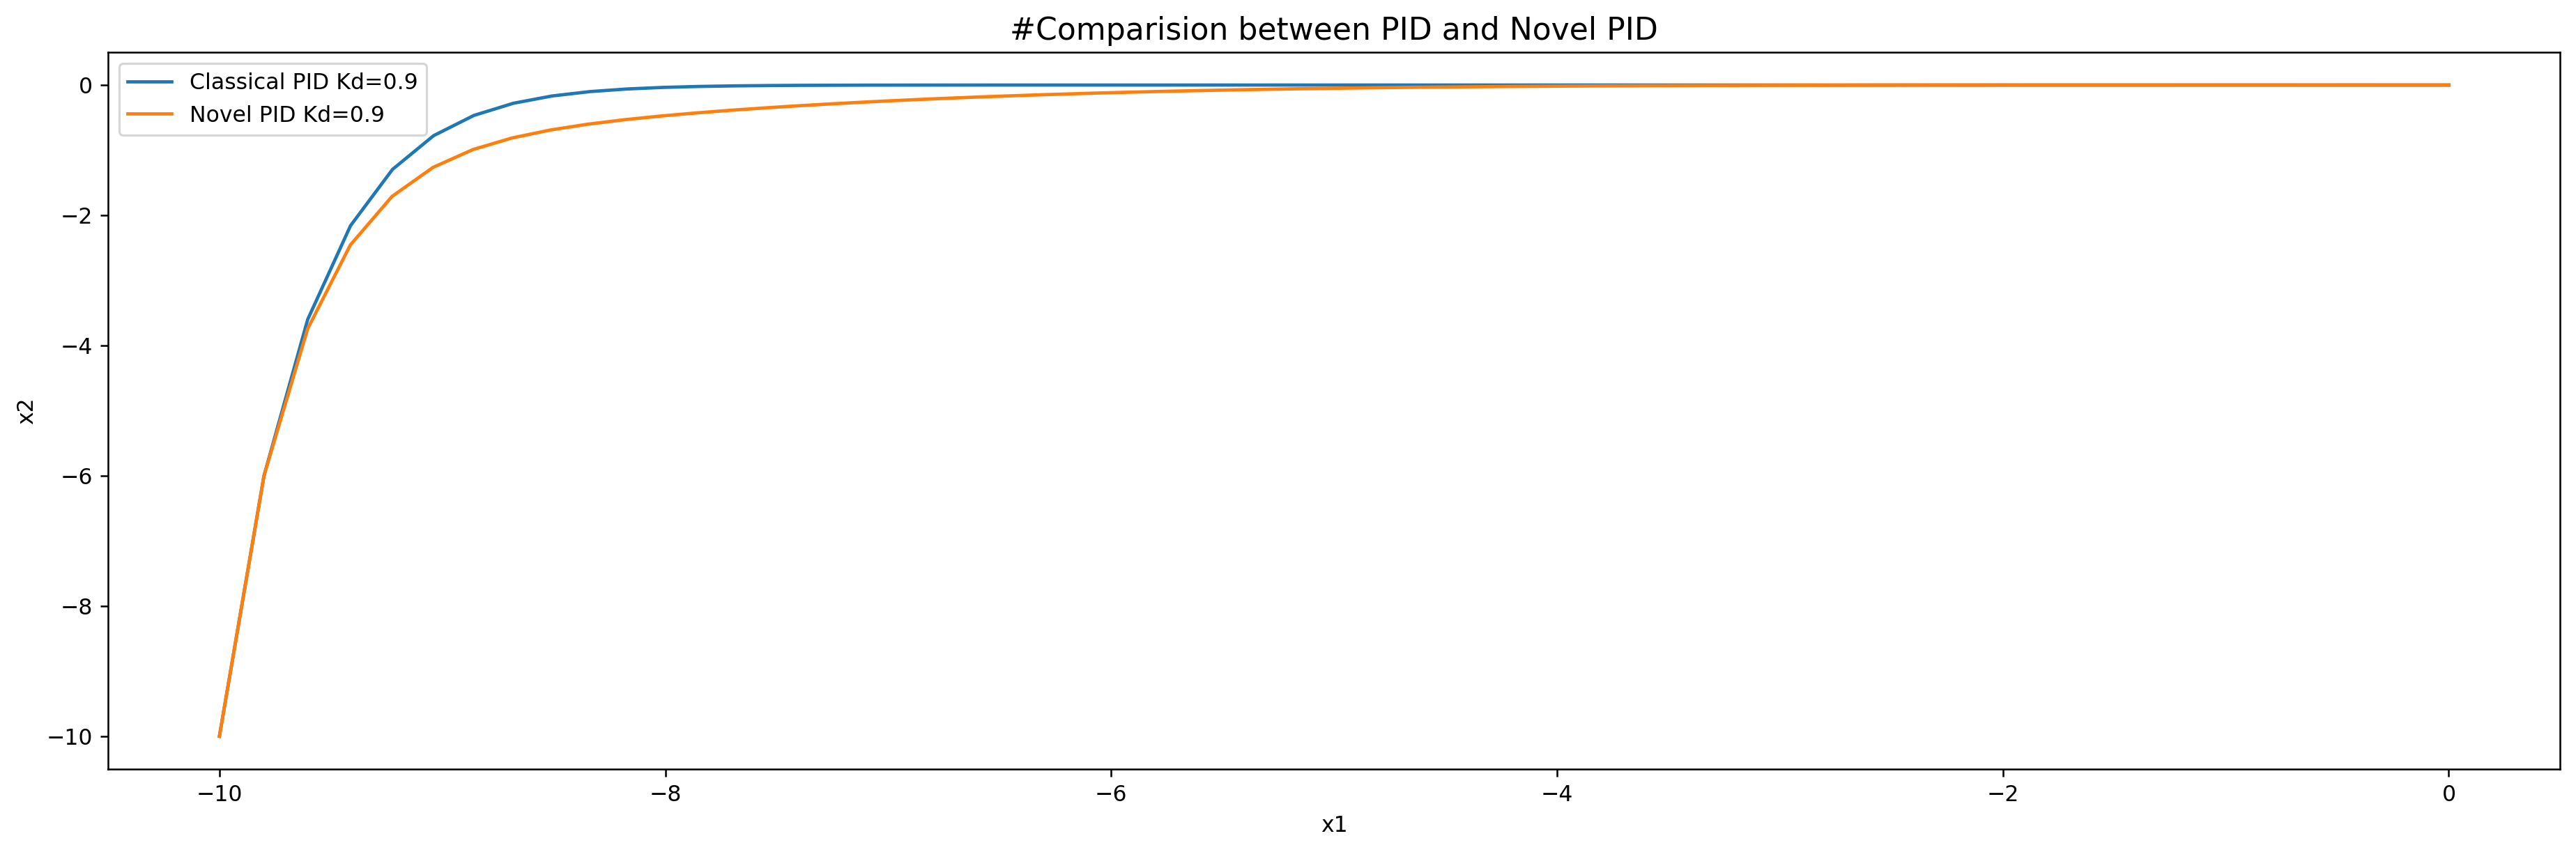

CPU times: user 958 ms, sys: 5.86 ms, total: 964 ms
Wall time: 970 ms


In [19]:
%%time
x_val = [l[0] for l in log5]
y_val = [l[1] for l in log5]

x_val_5 = [l[0] for l in log_5]
y_val_5 = [l[1] for l in log_5]

plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227

plt.title('#Comparision between PID and Novel PID', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val,y_val, label='Classical PID Kd=0.9')
plt.plot(x_val_5,y_val_5, label='Novel PID Kd=0.9')

plt.legend()

plt.show()

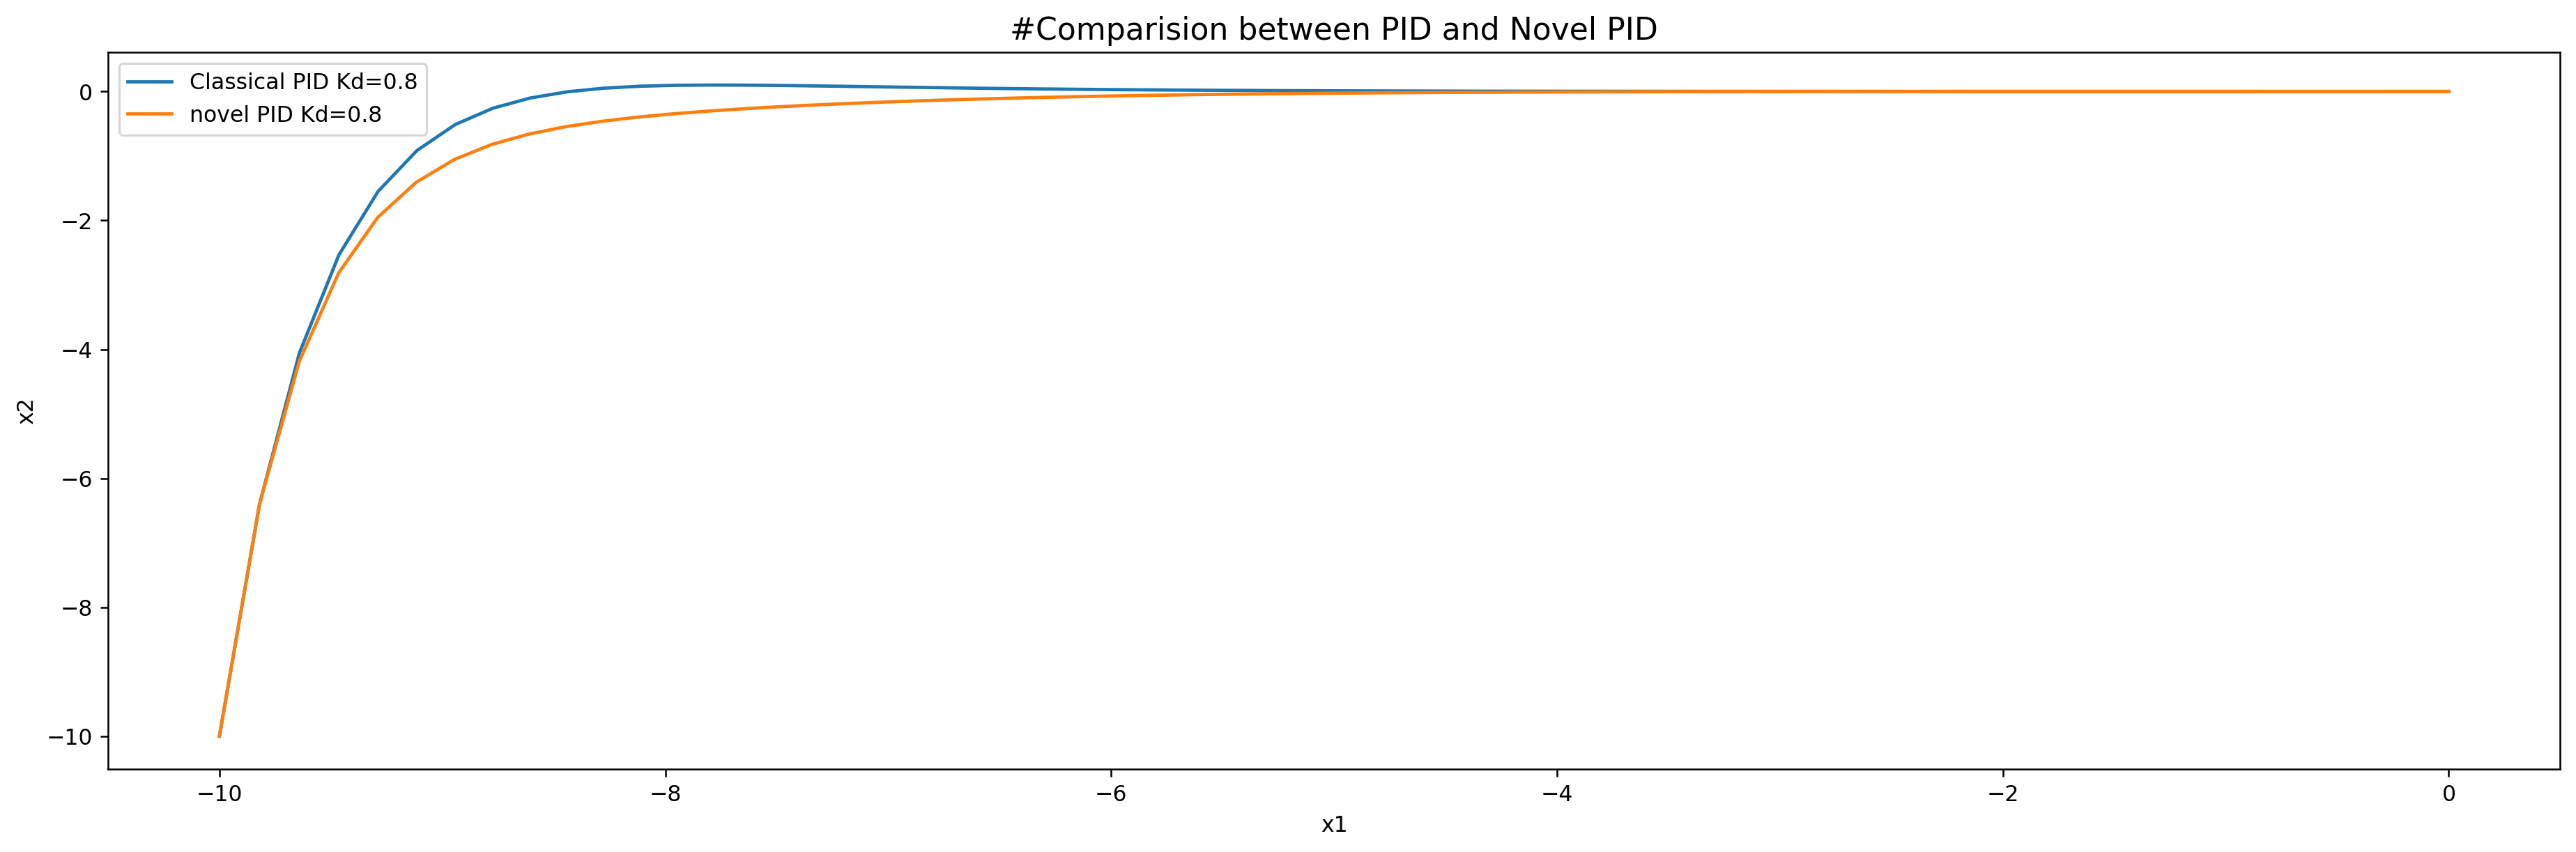

CPU times: user 880 ms, sys: 7.15 ms, total: 887 ms
Wall time: 892 ms


In [20]:
%%time
x_val = [l[0] for l in log6]
y_val = [l[1] for l in log6]

x_val_6 = [l[0] for l in log_6]
y_val_6 = [l[1] for l in log_6]

plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227

plt.title('#Comparision between PID and Novel PID', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val,y_val, label='Classical PID Kd=0.8')
plt.plot(x_val_6,y_val_6, label='novel PID Kd=0.8')

plt.legend()

plt.show()

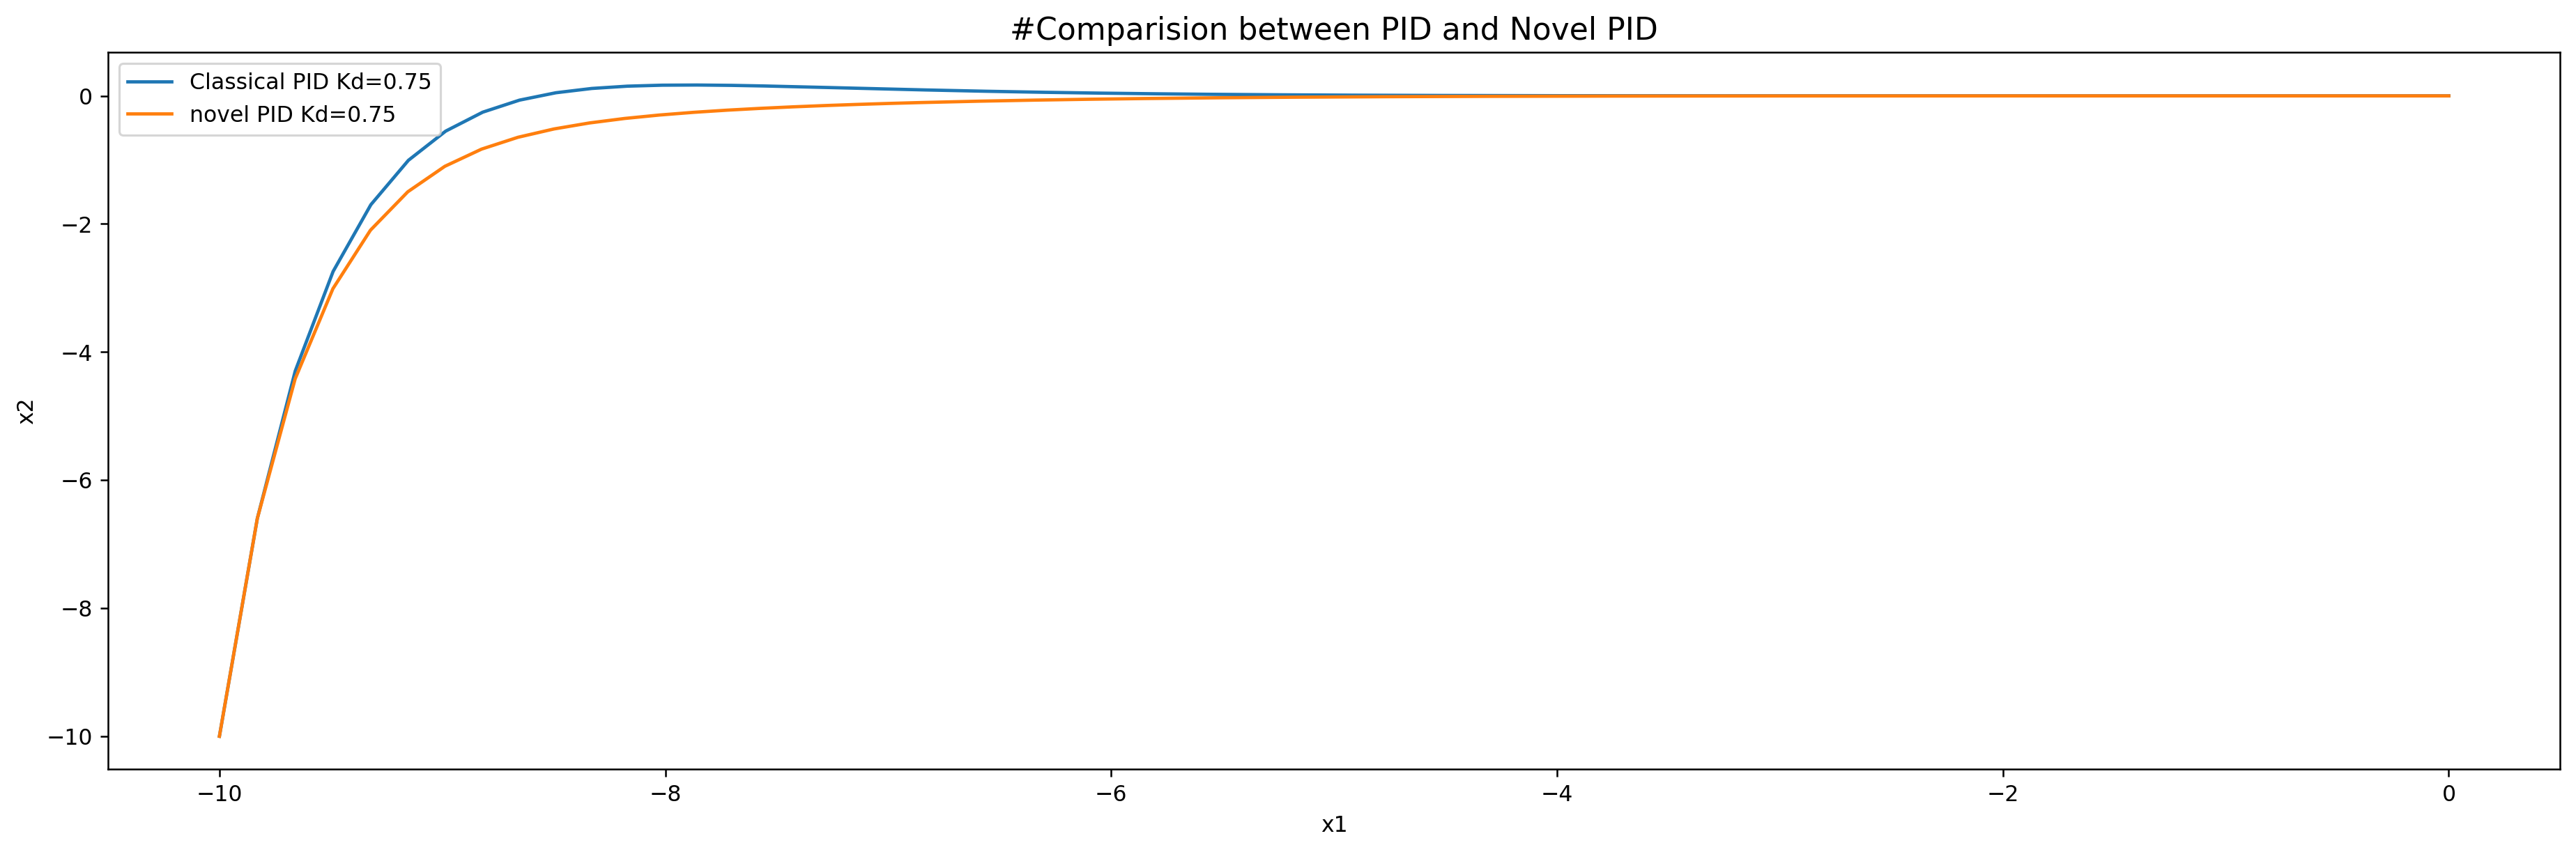

CPU times: user 925 ms, sys: 6.9 ms, total: 932 ms
Wall time: 933 ms


In [21]:
%%time
x_val = [l[0] for l in log7]
y_val = [l[1] for l in log7]

x_val_7 = [l[0] for l in log_7]
y_val_7 = [l[1] for l in log_7]

plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227

plt.title('#Comparision between PID and Novel PID', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val,y_val, label='Classical PID Kd=0.75')
plt.plot(x_val_7,y_val_7, label='novel PID Kd=0.75')

plt.legend()

plt.show()

In [22]:
#x1, x2, log8 = PID_Otimizer(lr=0.01, Kd=0.1) # Classical PID optimizer Not converging
#x1, x2, log_8 = Adaptive_PID_Nes(lr=2.0, Kd=0.1) #Not Converging for learning rate higher than 1.0
#x1, x2, log_8 = Adaptive_PID_Nes(lr=1.0, Kd= -0.1) #Kd = -0.1
#x1, x2, log_9 = Adaptive_PID_Nes(lr=1.0, Kd= -0.05) #Kd = -0.05
#x1, x2, log_10 = Adaptive_PID_Nes(lr=1.0, Kd= 0.01) #Kd = 0.01

In [23]:
x1, x2, log_11 = Adaptive_PID_Nes(lr=0.01, Kd= 0.0) #Kd = 0.0
x1, x2, log8 = PID_Otimizer(lr=0.01, Kd=0.0) # Classical PID optimizer also converging

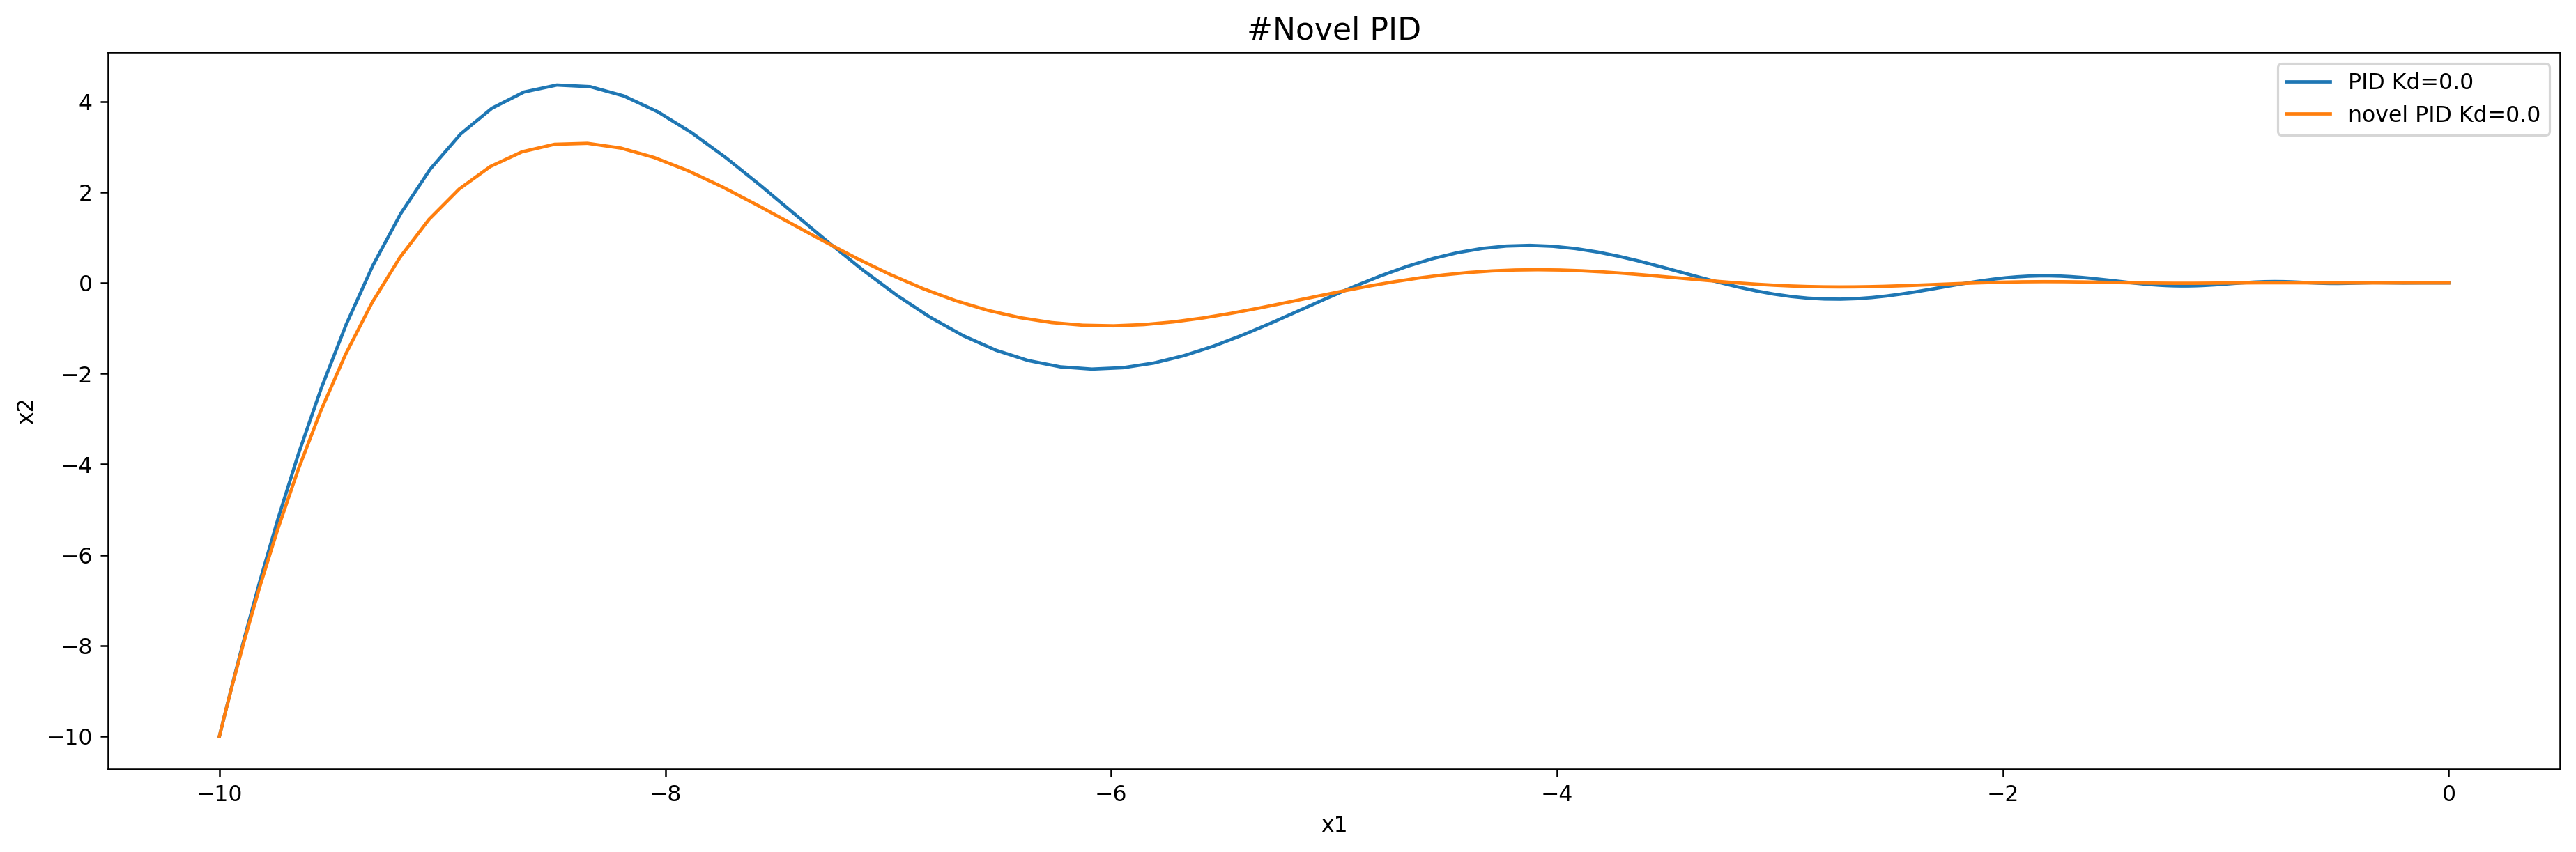

CPU times: user 840 ms, sys: 12.4 ms, total: 853 ms
Wall time: 857 ms


In [24]:
%%time

x_val = [l[0] for l in log8]
y_val = [l[1] for l in log8]
'''
x_val_8 = [l[0] for l in log_8]
y_val_8 = [l[1] for l in log_8]

x_val_9 = [l[0] for l in log_9]
y_val_9 = [l[1] for l in log_9]

x_val_10 = [l[0] for l in log_10]
y_val_10 = [l[1] for l in log_10]'''

x_val_11 = [l[0] for l in log_11]
y_val_11 = [l[1] for l in log_11]

plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227

plt.title('#Novel PID', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

#plt.plot(x_val,y_val, label='Classical PID Kd=0.1')
plt.plot(x_val,y_val, label='PID Kd=0.0')
'''
plt.plot(x_val_9,y_val_9, label='novel PID Kd=-0.05')
plt.plot(x_val_10,y_val_10, label='novel PID Kd=0.01')'''
plt.plot(x_val_11,y_val_11, label='novel PID Kd=0.0')

plt.legend()

plt.show()

'''Still convergeses after ignoring the Change in information completely in both the cases but our novel PID convergeses well.'''

In [25]:
x1, x2, log_11 = Adaptive_PID_Nes(lr=0.01, Kd= 0.1) #Kd = 0.0
#x1, x2, log8 = PID_Otimizer(lr=0.01, Kd=0.1) # Classical PID optimizer is not converging

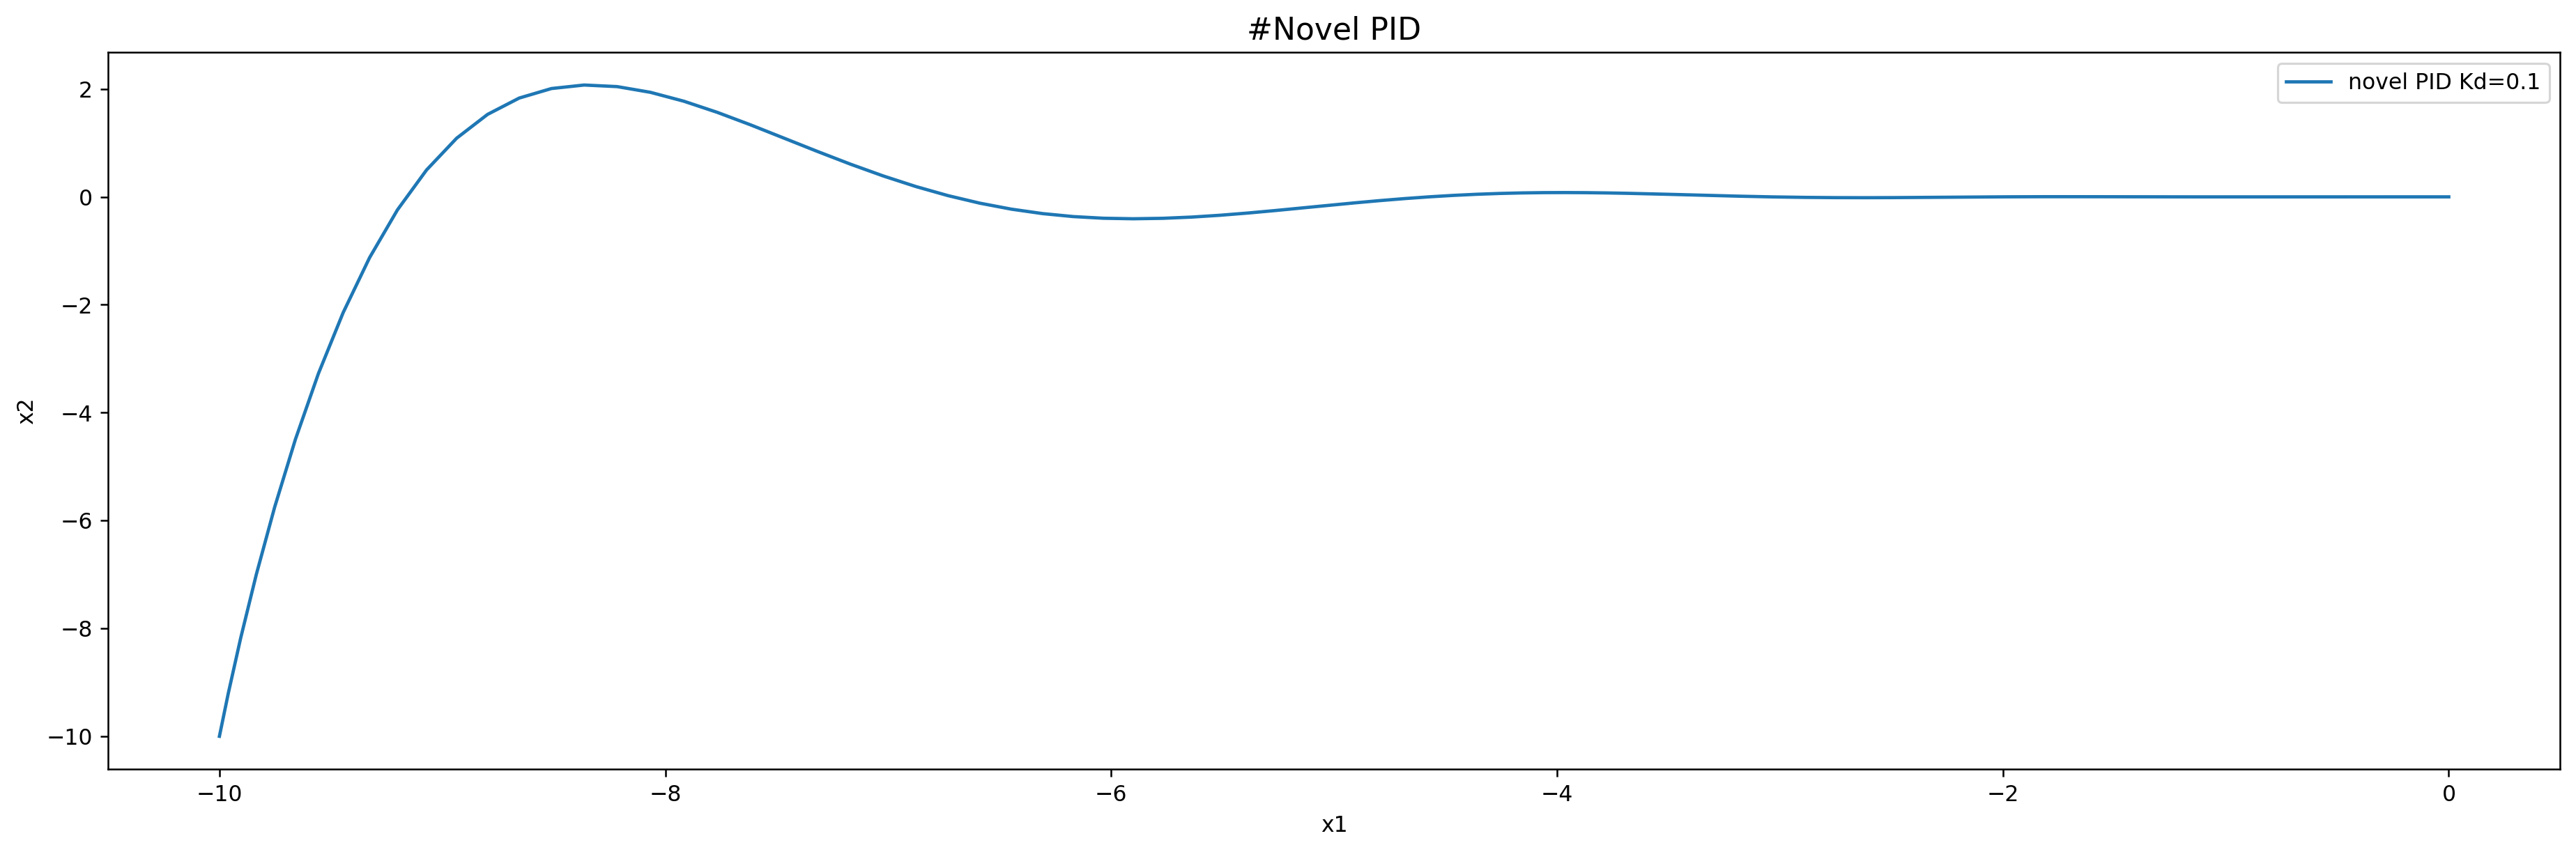

CPU times: user 818 ms, sys: 8.74 ms, total: 827 ms
Wall time: 830 ms


In [26]:
%%time
x_val_11 = [l[0] for l in log_11]
y_val_11 = [l[1] for l in log_11]

plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227

plt.title('#Novel PID', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val_11,y_val_11, label='novel PID Kd=0.1')

plt.legend()

plt.show()

In [27]:
x1, x2, log_11 = Adaptive_PID_Nes(lr=0.01, Kd= 0.4) #Kd = 0.4
#x1, x2, log8 = PID_Otimizer(lr=0.01, Kd=0.4) # Classical PID optimizer is not converging

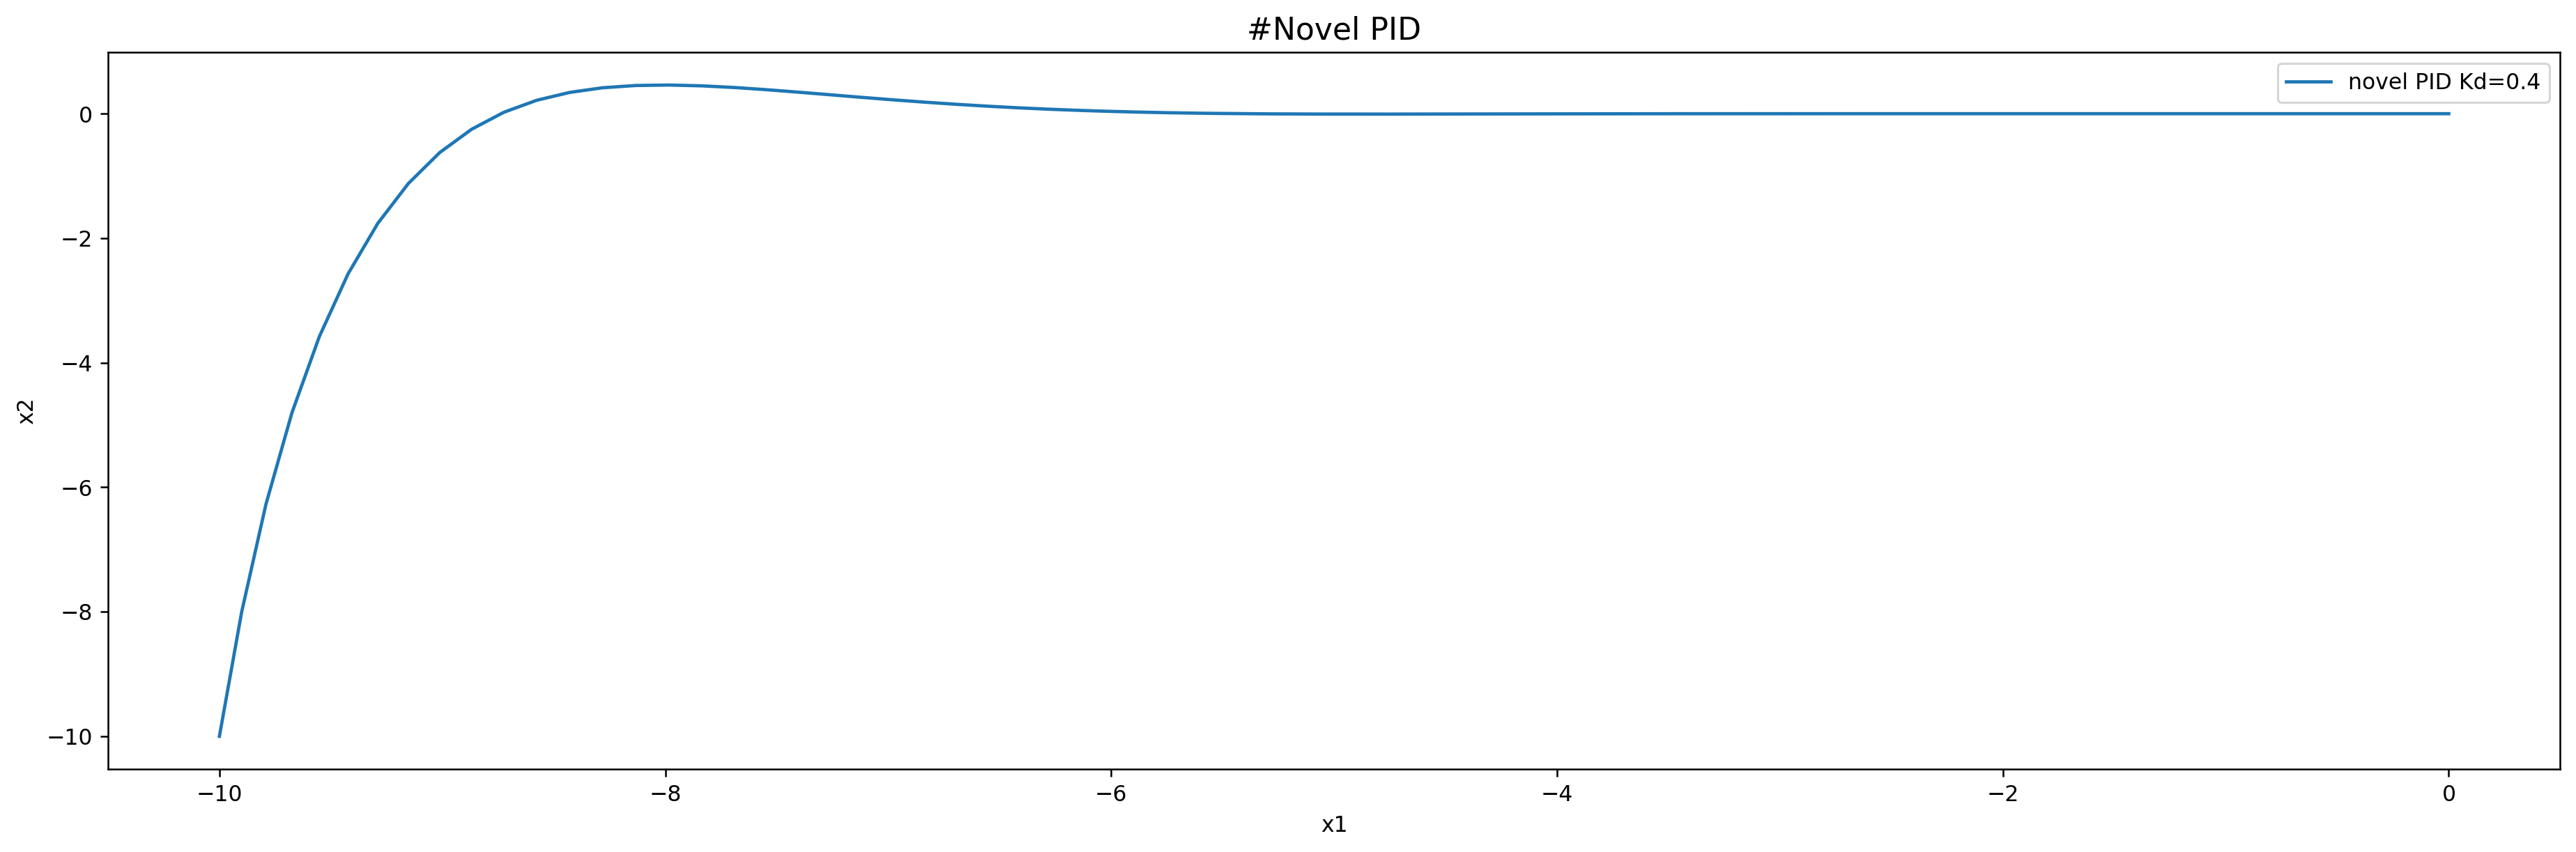

CPU times: user 809 ms, sys: 14.7 ms, total: 824 ms
Wall time: 832 ms


In [28]:
%%time

'''x_val = [l[0] for l in log8]
y_val = [l[1] for l in log8]'''

x_val_11 = [l[0] for l in log_11]
y_val_11 = [l[1] for l in log_11]

plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227

plt.title('#Novel PID', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

#plt.plot(x_val,y_val, label='PID Kd=0.4')
plt.plot(x_val_11,y_val_11, label='novel PID Kd=0.4')

plt.legend()

plt.show()

In [29]:
x1, x2, log_11 = Adaptive_PID_Nes(lr=0.01, Kd= 0.6) #Kd = 0.4
x1, x2, log8 = PID_Otimizer(lr=0.01, Kd=0.6) # Classical PID optimizer also converging

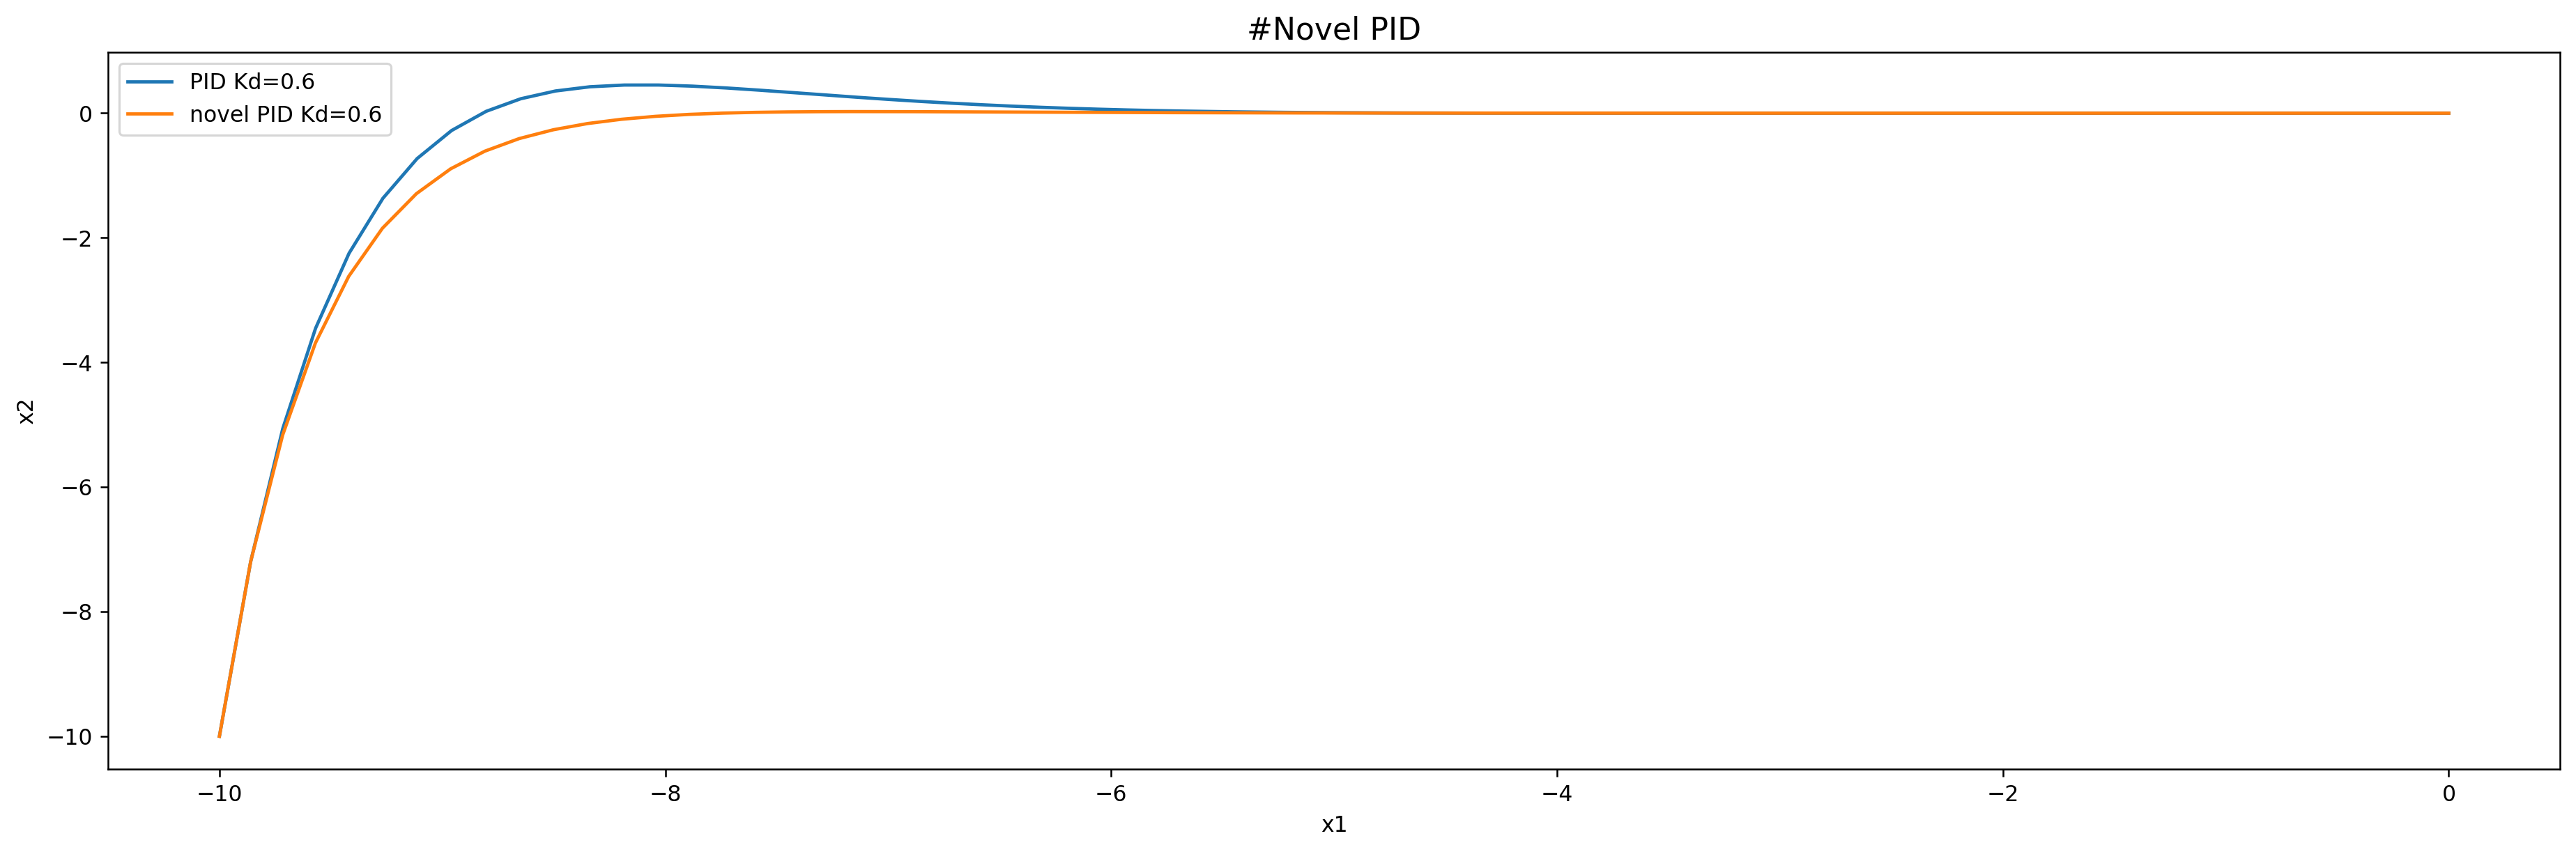

CPU times: user 856 ms, sys: 11.9 ms, total: 868 ms
Wall time: 872 ms


In [30]:
%%time

x_val = [l[0] for l in log8]
y_val = [l[1] for l in log8]

x_val_11 = [l[0] for l in log_11]
y_val_11 = [l[1] for l in log_11]

plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227

plt.title('#Novel PID', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val,y_val, label='PID Kd=0.6')
plt.plot(x_val_11,y_val_11, label='novel PID Kd=0.6')

plt.legend()

plt.show()

''' For Kd = 0.6 both converges but our novel PID performs better'''

In [43]:
x1, x2, log_11 = Adaptive_PID_Nes(lr=0.01, Kd=-0.05) #Kd = -0.05
#x1, x2, log8 = PID_Otimizer(lr=0.01, Kd=0.6) # Classical PID optimizer also converging

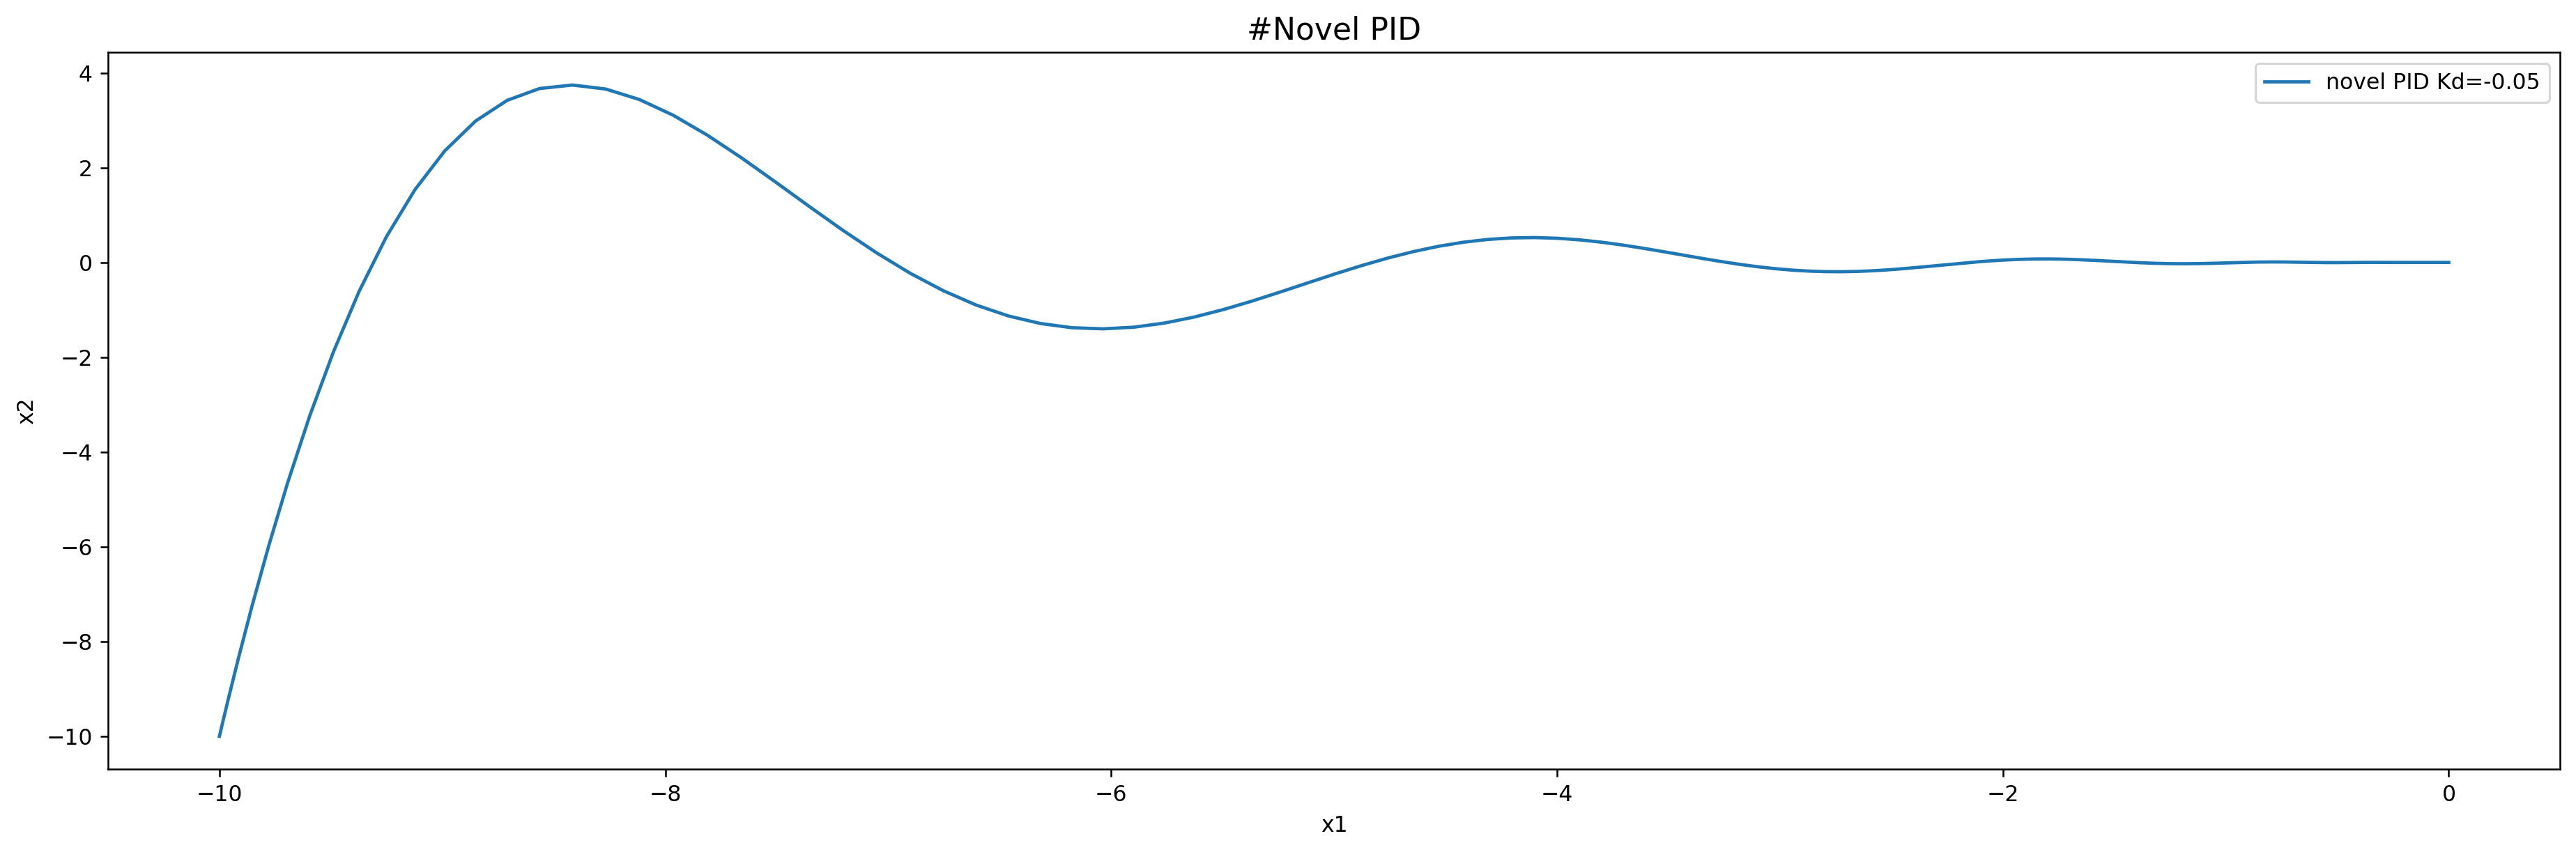

CPU times: user 796 ms, sys: 6.98 ms, total: 803 ms
Wall time: 806 ms


In [44]:
%%time

'''x_val = [l[0] for l in log8]
y_val = [l[1] for l in log8]'''

x_val_11 = [l[0] for l in log_11]
y_val_11 = [l[1] for l in log_11]

plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227

plt.title('#Novel PID', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

#plt.plot(x_val,y_val, label='PID Kd=0.4')
plt.plot(x_val_11,y_val_11, label='novel PID Kd=-0.05')

plt.legend()

plt.show()

In [31]:
#x1, x2, log_11 = Adaptive_PID_Nes(lr=0.01, Kd= 6) #Kd = 0.4
#x1, x2, log8 = PID_Otimizer(lr=0.01, Kd=6) # Classical PID optimizer also converging

''' For higher values both Our novel and classica PID is not convering.'''
''' Will try for Adaptive PID'''

' Will try for Adaptive PID'

#Conclusion



1.   i have calculated the gradient on partially updated value of parameters.
2.   Even converges faster when i don't calculated the gradient of partially updated values of parameters.
3.  Even Converges when i completely ignore the change in gradient information.
4.  Both are not converging on large value of Kd.(On my machine, may converge on Hardwre efficient machine)
5. For higher value of Kd classical PID slightly perform better than OUR Novel PID.
6. Conerges for smaller value of Kd -0.05 but not for -0.1 but again large overshoot.

#Work for Next Experiment:


1.   Will try to implement Adaptive PID with our novel PID.
2.   will compare with NAG, classical PID and Novel PID.
3.   Will try without partial update.

